In [1]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
from keras import backend as K
from keras.layers import Conv2D, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential, load_model
from process import get_data
import cv2

/home/kian/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X, Y = get_data("data/rat_video.mp4")

In [3]:
X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X = X/255.0
Y = Y/255.0

im1 = X[:, 0, :, :]
im2 = X[:, 1, :, :]

In [4]:
r1 = im1[:, :, :, 0]
g1 = im1[:, :, :, 1]
b1 = im1[:, :, :, 2]

r2 = im2[:, :, :, 0]
g2 = im2[:, :, :, 1]
b2 = im2[:, :, :, 2]

X_train = np.stack([r1, r2, g1, g2, b1, b2], axis=-1)

In [5]:
light = Sequential()

light.add(Conv2D(52, (4, 4), strides=(1, 1), activation='relu', padding="SAME", input_shape = (None, None, 6)))
light.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="SAME"))
light.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="SAME"))
light.add(Conv2D(3, (1, 1), strides=(1, 1), activation='relu', padding="SAME"))

light.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])

In [ ]:
light.fit(X_train, Y, epochs=1)

Epoch 1/1


In [7]:
light.save("weights1.h5")

In [12]:
pred = light.predict(X_train[0:5])

In [13]:
pred.min()
pred[0].shape

(360, 360, 3)

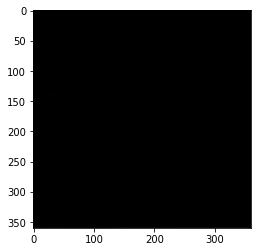

In [14]:
plt.imshow(pred[0])
plt.show()

In [15]:
cv2.imwrite("boom.png", pred[0]*255)

True